# Projeto de parceria com a escola EBAC

##Neste projeto iremos agrupar pessoas pela sua personalidade e categorizando-as com o método (OCEAN).

Five Personality Traits (OCEAN)
*  Openness to experience (inventive/curious vs. consistent/cautious)
*  Conscientiousness (efficient/organized vs. easy-going/careless)
*   Extroversion (outgoing/energetic vs. solitary/reserved)
*   Agreeableness (friendly/compassionate vs. challenging/detached)
*   Neuroticism (sensitive/nervous vs. secure/confident)


Link para projeto e base de dados: https://www.kaggle.com/tunguz/big-five-personality-test

Importando as bibliotecas

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from io import open
pd.options.display.max_columns = 150

Carregando e verificando Dataset

In [27]:
data = pd.read_csv('data-final.csv', sep='\t')
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,1.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00,9419.00,5491.00,3959.00,4821.00,5611.00,2756.00,2388.00,2113.00,5900.00,4110.00,6135.00,4150.00,5739.00,6364.00,3663.00,5070.00,5709.00,4285.00,2587.00,3997.00,4750.00,5475.00,11641.00,3115.00,3207.00,3260.00,10235.00,5897.00,1758.00,3081.00,6602.00,5457.00,1569.00,2129.00,3762.00,4420.00,9382.00,5286.00,4983.00,6339.00,3146.00,4067.00,2959.00,3411.00,2170.00,4920.00,4436.00,3116.00,2992.00,4354.00,2016-03-03 02:01:01,768.00,1024.00,9.00,234.00,6.00,1.00,GB,51.5448,0.1991
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,2.00,3.00,4.00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,4.00,1.00,5.00,1.00,5.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,3.00,3.00,1.00,3.00,3.00,5.00,3.00,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00,7235.00,3598.00,3315.00,2564.00,2976.00,3050.00,4787.00,3228.00,3465.00,3309.00,9036.00,2406.00,3484.00,3359.00,3061.00,2539.00,4226.00,2962.00,1799.00,1607.00,2158.00,2090.00,2143.00,2807.00,3422.00,5324.00,4494.00,3627.00,1850.00,1747.00,5163.00,5240.00,7208.00,2783.00,4103.00,3431.00,3347.00,2399.00,3360.00,5595.00,2624.00,4985.00,1684.00,3026.00,4742.00,3336.00,2718.00,3374.00,3096.00,3019.00,2016-03-03 02:01:20,1360.00,768.00,12.00,179.00,11.00,1.00,MY,3.1698,101.706
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,4.00,2.00,2.00,2.00,3.00,3.00,4.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00,4657.00,3549.00,2543.00,3335.00,5847.00,2540.00,4922.00,3142.00,14621.00,2191.00,5128.00,3675.00,3442.00,4546.00,8275.00,2185.00,2164.00,1175.00,3813.00,1593.00,1089.00,2203.00,3386.00,1464.00,2562.00,1493.00,3067.00,13719.00,3892.00,4100.00,4286.00,4775.00,2713.00,2813.00,4237.00,6308.00,2690.00,1516.00,2379.00,2983.00,1930.00,1470.00,1644.00,1683.00,2229.00,8114.00,2043.00,6295.00,1585.00,2529.00,2016-03-03 02:01:56,1366.00,768.00,3.00,186.00,7.00,1.00,GB,54.9119,-1.3833
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,4.00,1.00,2.00,2.00,3.00,1.00,4.00,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00,3996.00,2896.00,5096.00,4240.00,5168.00,5456.00,4360.00,4496.00,5240.00,4000.00,3736.00,4616.00,3015.00,2711.00,3960.00,4064.00,4208.00,2936.00,7336.00,3896.00,6062.00,11952.00,1040.00,2264.00,3664.00,3049.00,4912.00,7545.00,4632.00,6896.00,2824.00,520.00,2368.00,3225.00,2848.00,6264.00,3760.00,10472.00,3192.00,7704.00,3456.00,6665.00,1977.00,3728.00,4128.00,3776.00,2984.00,4192.00,3480.00,3257.00,2016-03-03 02:02:02,1920.00,1200.00,186.00,219.00,7.00,1.00,GB,51.75,-1.25
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,1.00,5.00,5.00,3.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,5.00,3.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,1.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00,6004.00,3965.00,2721.00,3706.00,2968.00,2426.00,7339.00,3302.00,16819.00,3731.00,4740.00,2856.00,7461.00,217

Excluindo os atributos irrelevantes.                                  
Isso levando em conta que queremos apenas as colunas aonde representam as respostas para as questões.

In [28]:
data.drop(data.columns[50:110], axis=1, inplace=True)

Em seguida verificando novamente o Dataset.

In [29]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,1.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,2.00,3.00,4.00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,4.00,1.00,5.00,1.00,5.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,3.00,3.00,1.00,3.00,3.00,5.00,3.00,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,4.00,2.00,2.00,2.00,3.00,3.00,4.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,4.00,1.00,2.00,2.00,3.00,1.00,4.00,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,1.00,5.00,5.00,3.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,5.00,3.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,1.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00


Analisando estatísticas da base de dados.

In [30]:
pd.options.display.float_format = "{:.2f}".format
data.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00,662443.00
mean,2.65,2.78,3.29,3.14,3.27,2.43,2.78,3.42,2.96,3.56,3.28,3.18,3.85,2.68,2.85,2.85,3.06,2.69,3.10,2.76,2.29,3.82,2.28,3.92,2.28,3.74,2.21,3.68,3.78,3.58,3.28,2.92,3.97,2.63,2.63,2.84,3.68,2.49,3.19,3.57,3.62,2.12,3.99,2.05,3.77,1.91,3.96,3.14,4.08,3.93
std,1.26,1.33,1.22,1.24,1.28,1.24,1.40,1.27,1.35,1.31,1.35,1.23,1.16,1.25,1.28,1.33,1.29,1.34,1.30,1.32,1.35,1.14,1.28,1.13,1.17,1.23,1.12,1.10,1.16,1.08,1.18,1.39,1.04,1.25,1.28,1.41,1.13,1.14,1.28,1.05,1.16,1.12,1.10,1.10,1.00,1.11,1.01,1.25,1.05,1.04
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,2.00,4.00,3.00
50%,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,4.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,4.00,4.00,3.00,3.00,4.00,3.00,3.00,3.00,4.00,3.00,3.00,4.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,5.00,4.00,4.00,5.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,5.00,3.00,5.00,3.00,5.00,3.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,3.00,4.00,4.00,5.00,3.00,5.00,3.00,4.00,2.00,5.00,4.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


Verificando a contagem de registros por valor.

In [31]:
data["EXT1"].value_counts()

3.00    192797
1.00    163267
2.00    126664
4.00    123761
5.00     53426
0.00      2528
Name: EXT1, dtype: int64

Selecionando o total de registros com o valor zero.

In [32]:
data[(data == 0.00).all(axis=1)].describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00,1421.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Limpando o Dataframe com apenas registros maiores que zero.

In [33]:
data = data[(data > 0.00).all(axis=1)]

Verificando a contagem de registros por valor.

In [34]:
data["EXT1"].value_counts()

3.00    164103
1.00    140645
2.00    111232
4.00    106831
5.00     43851
Name: EXT1, dtype: int64

## **Qual o número de clusters que vamos definir?**

Instalando a yellowbrick

In [ ]:
!pip install yellowbrick

Importando as bibliotecas que iremos trabalhar

In [36]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

Instanciando o método KMeans e o Visualizer.

In [37]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))

Selecionando uma amostra aleatória dos dados com 5000 observações.

In [38]:
data_sample = data.sample(n=5000, random_state=1)

## Executando o teste.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

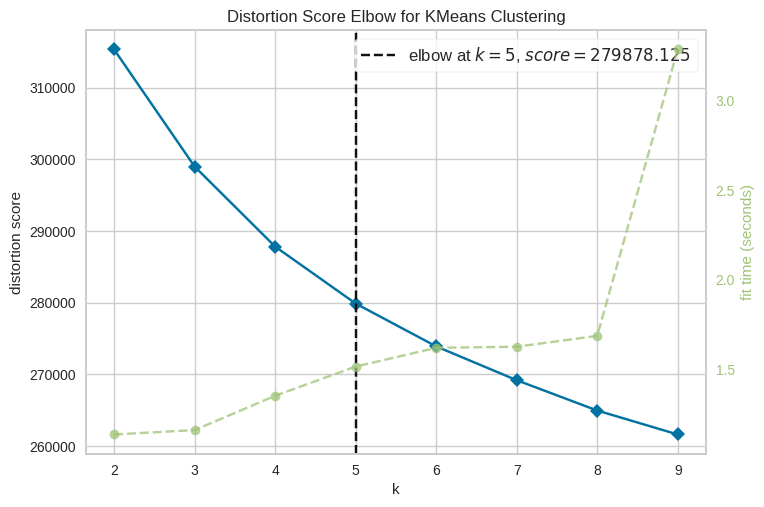

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
visualizer.fit(data_sample)
visualizer.poof()

## Agrupando os participantes em 5 grupos

Atribuindo os registros aos devidos grupos

In [ ]:
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(data)

Inserindo os rótulos dos clusters no dataframe

In [41]:
predicoes = k_fit.labels_
data['Clusters'] = predicoes

Verificando os dados

In [42]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,1.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00,3
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,2.00,3.00,4.00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,4.00,1.00,5.00,1.00,5.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,3.00,3.00,1.00,3.00,3.00,5.00,3.00,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00,4
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,4.00,2.00,2.00,2.00,3.00,3.00,4.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00,4
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,4.00,1.00,2.00,2.00,3.00,1.00,4.00,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00,2
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,1.00,5.00,5.00,3.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,5.00,3.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,1.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00,3


## Analisando os grupos

Qual a quantidade de observações em cada grupo?

In [ ]:
data["Clusters"].value_counts()

Agrupando os registros por grupos e calculando a média de cada grupo de questões para verificar um padrão.

In [ ]:
data.groupby('Clusters').mean()

Selecionando as colunas de cada grupo.

In [45]:
col_list = list(data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

Somando os valores de cada grupo

In [46]:
data_soma = pd.DataFrame()
data_soma['extroversion'] = data[ext].sum(axis=1)/10
data_soma['neurotic'] = data[est].sum(axis=1)/10
data_soma['agreeable'] = data[agr].sum(axis=1)/10
data_soma['conscientious'] = data[csn].sum(axis=1)/10
data_soma['open'] = data[opn].sum(axis=1)/10
data_soma['clusters'] = predicoes

Exibindo o valor médio por grupo

In [ ]:
data_soma.groupby('clusters').mean()

Visualizando as médias por grupo.

In [50]:
data_clusters = data_soma.groupby('clusters').mean()

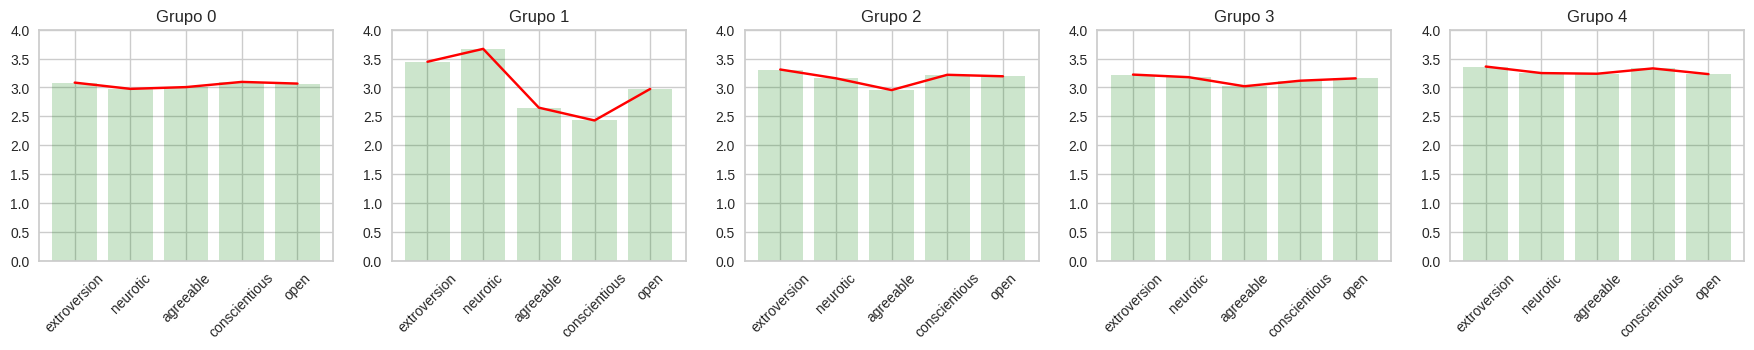

In [51]:
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(data_clusters.columns, data_clusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(data_clusters.columns, data_clusters.iloc[:, i], color='red')
    plt.title('Grupo ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);

## Para que nós mesmos conseguissemos responder a estas perguntas, iremos fazer duas opções. Uma que consiste em salvar o arquivo em uma planilha, responde-la e trazer de volta para o ambiente para que o sistema nos diga nosso grupo. Já a segunda será uma interface aonde apareça o nome da questão, não apenas sua reprsentação e limitando o úsuario a entrar apenas com os dados corretos, os dados que são aceitos nesse questionário.

### Forma de planilhas
Criando uma planilha para entrar com os dados

In [52]:
data[:0].to_excel("perguntas.xlsx",index=False)

Recuperando os dados

In [53]:
meus_dados = pd.read_excel('perguntas.xlsx')

Passando meus dados para o modelo

In [ ]:
grupo_personalidade = k_fit.predict(meus_dados)[0]
print('Meu grupo de personalidade é: ', grupo_personalidade)

### Forma de interface

Instalando a biblioteca gradio

In [ ]:
!pip install gradio

In [148]:
from gradio import gradio, interface

Lendo os dados com as questões.

In [101]:
dicio_questions = open("codebook.txt").read().split("\n")

Verificando os dados.

In [ ]:
dicio_questions

Limpando os dados e recuperando apenas as questões

In [127]:
questions = []
for q in dicio_questions:
  q = str(q)
  questions.append(q[q.find("\t"):].lstrip())

In [ ]:
questions

Criando os inputs dinamicos para passar ao gradio

In [142]:
inputs_questions = []
for q in questions:
  obj_input = gradio.inputs.Slider(minimum=1,maximum=5,step=1,default=3,label=q)
  inputs_questions.append(obj_input)

Verificando os inputs

In [ ]:
inputs_questions

Criando a interface e a função predict.

In [ ]:
def predict(*outputs_questions):
    outputs_questions = np.array(outputs_questions).reshape(1, -1)
    return k_fit.predict(outputs_questions)

iface = gradio.Interface(
                    fn = predict,
                    title = "Big Five Personality",
                    description = "Sistema para detecção de traços de personalidade.",
                    inputs = inputs_questions,
                    outputs="text").launch()